In [10]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import matplotlib.pyplot as plt
from dateutil import relativedelta
from datetime import datetime
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# For reading stock data from yahoo
import pandas_datareader as web
import yfinance as yf



In [9]:
# Retrieving List of World Major Stock Indices from Yahoo! Finance
df_list = pd.read_html('https://finance.yahoo.com/world-indices/')
majorStockIdx = df_list[0]
majorStockIdx.head()

ValueError: No tables found

In [ ]:
!pip install pandas_datareader

In [ ]:
!pip install yfinance

# Daily Return for Equally Weighted Market Portfolio 


In [2]:
# For time stamps
from datetime import datetime
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(2006,1,1)

# ^IXIC is the symbol of NASDAQ Portfolio in Yahoo! Finance

tickerData = yf.Ticker('^IXIC')
tickerDf1 = tickerData.history(period='1d', start = start, end = end )
tickerDf1 = tickerDf1.reset_index()
tickerDf1['ticker'] = '^IXIC'
tickerDf1.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
0,2006-01-03,2216.530029,2249.679932,2189.909912,2243.739990,1998300000,0,0,^IXIC
1,2006-01-04,2246.959961,2265.280029,2246.070068,2263.459961,1887560000,0,0,^IXIC
2,2006-01-05,2264.929932,2277.560059,2264.500000,2276.870117,1891750000,0,0,^IXIC
3,2006-01-06,2289.209961,2306.719971,2281.010010,2305.620117,2233640000,0,0,^IXIC
4,2006-01-09,2306.179932,2322.629883,2303.129883,2318.689941,1949140000,0,0,^IXIC


In [3]:
# Get the data for 3 Jan 2006
begRef = tickerDf1.loc[tickerDf1.Date == '2006-01-03']
def retBegin(val):
    start_val = begRef['Close']
    return (val/start_val)
    
tickerDf1['Market_Portfolio'] = tickerDf1.apply(lambda x: retBegin(x.Close), axis = 1)
tickerDf1 = tickerDf1.fillna(method='bfill')
tickerDf1.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Market_Portfolio
0,2006-01-03,2216.530029,2249.679932,2189.909912,2243.739990,1998300000,0,0,^IXIC,1.000000
1,2006-01-04,2246.959961,2265.280029,2246.070068,2263.459961,1887560000,0,0,^IXIC,1.008789
2,2006-01-05,2264.929932,2277.560059,2264.500000,2276.870117,1891750000,0,0,^IXIC,1.014766
3,2006-01-06,2289.209961,2306.719971,2281.010010,2305.620117,2233640000,0,0,^IXIC,1.027579
4,2006-01-09,2306.179932,2322.629883,2303.129883,2318.689941,1949140000,0,0,^IXIC,1.033404


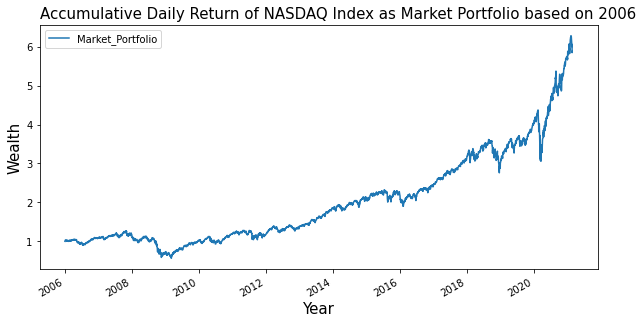

In [4]:
tickerDf1.plot(x = 'Date', y= 'Market_Portfolio', figsize = (10,5))
plt.title('Accumulative Daily Return of NASDAQ Index as Market Portfolio based on 2006',
          loc ='left', fontsize=15, fontweight=0, color='black')


plt.xlabel('Year', fontsize=15)
plt.ylabel('Wealth', fontsize=15)
plt.show()




# Daily Return for Equally Weighted Selected Portfolio 


In [8]:
# List of stocks we'll use for this analysis

stock_list = ['CAKE','CHIC','FUN','LUV', 'ROCK', 'YUM', 'PZZA',
                'MSFT','SHOO', 'CASH', 'BUD', 'BIDU', 
                'AAPL','DOV']

prices = web.DataReader(stock_list, 'yahoo', start, end)['Close']
prices = prices.reset_index()


In [9]:
prices.head()

Symbols,Date,CAKE,CHIC,FUN,LUV,ROCK,YUM,PZZA,MSFT,SHOO,CASH,BUD,BIDU,AAPL,DOV
0,2006-01-03,37.209999,NaN,28.270000,16.430000,23.780001,16.804457,15.597500,26.840000,4.020412,6.550000,NaN,6.350,2.669643,27.812225
1,2006-01-04,36.869999,NaN,28.090000,16.940001,23.570000,16.948238,15.885000,26.969999,3.872922,6.760000,NaN,6.630,2.677500,28.288164
2,2006-01-05,36.810001,NaN,28.040001,16.990000,23.370001,17.670740,16.299999,26.990000,4.052016,6.716667,NaN,6.620,2.656429,28.147392
3,2006-01-06,37.070000,NaN,27.900000,17.100000,23.440001,17.620417,16.577499,26.910000,4.003292,6.813333,NaN,6.584,2.725000,28.616629
4,2006-01-09,37.060001,NaN,28.150000,17.129999,23.650000,17.757010,16.827499,26.860001,4.104691,6.813333,NaN,6.613,2.716071,29.018829


In [10]:
prices['Portfolio'] = prices.iloc[:,1:].sum(1)
prices['Portfolio_return'] = prices['Portfolio'].pct_change()
prices['Clever_ticket_portfolio'] = (1 + prices['Portfolio_return'].fillna(0)).cumprod()
#tickerDf1['chBegin'] = tickerDf1.apply(lambda x: retBegin(x.Close), axis = 1)

In [11]:
prices.tail(10)

Symbols,Date,CAKE,CHIC,FUN,LUV,ROCK,YUM,PZZA,MSFT,SHOO,CASH,BUD,BIDU,AAPL,DOV,Portfolio,Portfolio_return,Clever_ticket_portfolio
3804,2021-02-12,50.009998,34.680000,42.950001,51.340000,95.050003,105.470001,109.139999,244.990005,36.570000,42.730000,63.560001,313.000000,135.369995,122.730003,1447.590008,0.001210,6.817506
3805,2021-02-16,50.049999,34.959999,43.599998,51.959999,96.220001,105.599998,102.540001,243.699997,36.099998,43.049999,64.730003,326.200012,133.190002,121.650002,1453.550011,0.004117,6.845575
3806,2021-02-17,47.330002,34.200001,45.250000,52.439999,98.180000,104.339996,100.400002,244.199997,35.580002,43.770000,64.330002,308.679993,130.839996,120.629997,1430.169987,-0.016085,6.735466
3807,2021-02-18,51.200001,33.419998,45.709999,51.950001,95.220001,105.370003,101.660004,243.789993,35.959999,42.840000,63.900002,298.010010,129.710007,120.940002,1419.680019,-0.007335,6.686063
3808,2021-02-19,52.750000,34.400002,46.480000,52.810001,96.790001,105.129997,103.680000,240.970001,36.470001,43.500000,64.459999,339.910004,129.869995,122.250000,1469.470001,0.035071,6.920551
3809,2021-02-22,53.980000,32.990002,48.000000,54.790001,95.970001,105.010002,103.660004,234.509995,37.480000,44.040001,64.349998,335.790009,126.000000,122.139999,1458.710011,-0.007322,6.869877
3810,2021-02-23,53.790001,32.799999,47.660000,56.720001,95.110001,104.650002,101.900002,233.270004,37.400002,44.709999,65.019997,322.609985,125.860001,121.980003,1443.479996,-0.010441,6.798150
3811,2021-02-24,55.520000,32.200001,48.660000,59.290001,97.720001,104.680000,102.639999,234.550003,38.029999,44.869999,65.250000,304.010010,125.349998,125.500000,1438.270012,-0.003609,6.773613
3812,2021-02-25,54.529999,31.330000,48.540001,58.310001,90.279999,104.699997,90.750000,228.990005,37.750000,44.090000,60.110001,294.200012,120.989998,124.279999,1388.850012,-0.034361,6.540867
3813,2021-02-26,54.950001,30.990000,49.169998,58.130001,87.349998,103.529999,90.190002,232.380005,36.990002,44.290001,57.730000,283.459991,121.260002,123.260002,1373.680002,-0.010923,6.469423


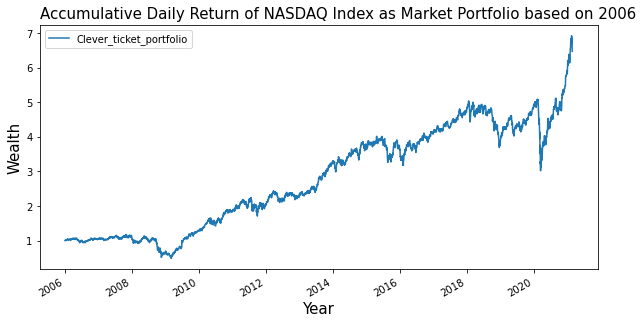

In [12]:
prices.plot(x = 'Date', y= 'Clever_ticket_portfolio', figsize = (10,5))
plt.title('Accumulative Daily Return of NASDAQ Index as Market Portfolio based on 2006',
          loc ='left', fontsize=15, fontweight=0, color='black')


plt.xlabel('Year', fontsize=15)
plt.ylabel('Wealth', fontsize=15)
plt.show()

In [13]:
final = pd.merge(tickerDf1, prices, on = 'Date')
final.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Market_Portfolio,...,MSFT,SHOO,CASH,BUD,BIDU,AAPL,DOV,Portfolio,Portfolio_return,Clever_ticket_portfolio
0,2006-01-03,2216.530029,2249.679932,2189.909912,2243.739990,1998300000,0,0,^IXIC,1.000000,...,26.840000,4.020412,6.550000,NaN,6.350,2.669643,27.812225,212.334238,NaN,1.000000
1,2006-01-04,2246.959961,2265.280029,2246.070068,2263.459961,1887560000,0,0,^IXIC,1.008789,...,26.969999,3.872922,6.760000,NaN,6.630,2.677500,28.288164,213.501824,0.005499,1.005499
2,2006-01-05,2264.929932,2277.560059,2264.500000,2276.870117,1891750000,0,0,^IXIC,1.014766,...,26.990000,4.052016,6.716667,NaN,6.620,2.656429,28.147392,214.363246,0.004035,1.009556
3,2006-01-06,2289.209961,2306.719971,2281.010010,2305.620117,2233640000,0,0,^IXIC,1.027579,...,26.910000,4.003292,6.813333,NaN,6.584,2.725000,28.616629,215.360170,0.004651,1.014251
4,2006-01-09,2306.179932,2322.629883,2303.129883,2318.689941,1949140000,0,0,^IXIC,1.033404,...,26.860001,4.104691,6.813333,NaN,6.613,2.716071,29.018829,216.700433,0.006223,1.020563


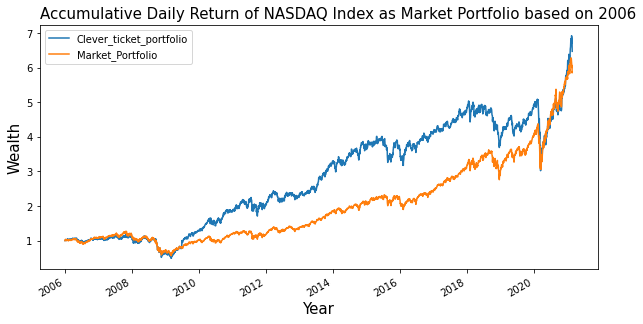

In [14]:
ax = plt.gca() # gca stands for 'get current axis'

final.plot(x = 'Date', y= 'Clever_ticket_portfolio', figsize = (10,5), ax=ax)
final.plot(x = 'Date', y= 'Market_Portfolio', figsize = (10,5), ax=ax)
plt.title('Accumulative Daily Return of NASDAQ Index as Market Portfolio based on 2006',
          loc ='left', fontsize=15, fontweight=0, color='black')


plt.xlabel('Year', fontsize=15)
plt.ylabel('Wealth', fontsize=15)
plt.show()